## Mask R-CNN - Inspect Weights of a Trained Model

This notebook includes code and visualizations to test, debug, and evaluate the Mask R-CNN model.

In [1]:
!apt-get update
# Install a Drive FUSE wrapper.
# https://github.com/astrada/google-drive-ocamlfuse
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse tree

# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive', force_remount=True)

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1710/x86_64  InRelease
Get:2 http://security.ubuntu.com/ubuntu bionic-security InRelease [83.2 kB]
Hit:3 http://ppa.launchpad.net/alessandro-strada/ppa/ubuntu bionic InRelease
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1604/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1710/x86_64  Release
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1604/x86_64  Release
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:9 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:10 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Fetched 247 kB in 2s (126 kB/s)
Reading package lists... Done
E: Package 'python-software-properties' has no installation candidate
Mounted at /content/drive


In [0]:
import os
import sys
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import keras

# Root directory of the project
#ROOT_DIR = os.path.abspath("../../")
ROOT_DIR = '/content/drive/My Drive/Colab Notebooks/car-damage-detector'

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
from mrcnn.model import log

%matplotlib inline 

# # Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")


## Configurations

In [24]:
!pwd
!ls

print(MODEL_DIR)

/content/drive/My Drive/Colab Notebooks/car-damage-detector
 balloon.py			   logs
 build_dataset.py		   mask_rcnn_coco.h5
 custom_multiclass.py		   mrcnn
 custom.py			   output.gif
 dataset			   __pycache__
 detect_a_car_with_deeplab.ipynb   README.md
 detect_a_car_with_ssd.ipynb	   requirements.txt
 inspect_custom_data.ipynb	   setup.cfg
 inspect_custom_model.ipynb	   setup.py
 inspect_custom_weights.ipynb	   splash_20181111T051633.png
 inspect_data.ipynb		   splash_20181111T051747.png
 inspect_model.ipynb		  'Train Car Damage Detector.ipynb'
 inspect_weights.ipynb		   via-annotation-ui.png
 LICENSE
/content/drive/My Drive/Colab Notebooks/car-damage-detector/logs


In [0]:
# Run one of the code blocks

# Shapes toy dataset
# import shapes
# config = shapes.ShapesConfig()

# MS COCO Dataset
import custom
config = custom.CustomConfig()

## Notebook Preferences

In [0]:
# Device to load the neural network on.
# Useful if you're training a model on the same 
# machine, in which case use CPU and leave the
# GPU for training.
DEVICE = "/gpu:0"  # /cpu:0 or /gpu:0

In [0]:
def get_ax(rows=1, cols=1, size=16):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

## Load Model

In [29]:
# Create model in inference mode
with tf.device(DEVICE):
    model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR,
                              config=config)
# Load weights
weights_path = '/content/drive/My Drive/Colab Notebooks/car-damage-detector/logs/damage20181111T0345/mask_rcnn_damage_0010.h5'

# Load weights
print("Loading weights ", weights_path)
model.load_weights(weights_path, by_name=True)

Loading weights  /content/drive/My Drive/Colab Notebooks/car-damage-detector/logs/damage20181111T0345/mask_rcnn_damage_0010.h5
Re-starting from epoch 10


## Review Weight Stats

In [30]:
# Show stats of all trainable weights    
visualize.display_weight_stats(model)

WEIGHT NAME,SHAPE,MIN,MAX,STD
conv1_3/kernel:0,"(7, 7, 3, 64)",-0.8616,+0.8451,+0.1315
conv1_3/bias:0,"(64,)",-0.0002,+0.0004,+0.0001
bn_conv1_3/gamma:0,"(64,)",+0.0835,+2.6411,+0.5091
bn_conv1_3/beta:0,"(64,)",-2.3931,+5.3610,+1.9781
bn_conv1_3/moving_mean:0,"(64,)",-173.0470,+116.3013,+44.5654
bn_conv1_3/moving_variance:0*** Overflow?,"(64,)",+0.0000,+146335.3594,+21847.9668
res2a_branch2a_3/kernel:0,"(1, 1, 64, 64)",-0.6574,+0.3179,+0.0764
res2a_branch2a_3/bias:0,"(64,)",-0.0022,+0.0082,+0.0018
bn2a_branch2a_3/gamma:0,"(64,)",+0.2169,+1.8489,+0.4116
bn2a_branch2a_3/beta:0,"(64,)",-2.1180,+3.7332,+1.1786


# Histograms of Weights

TODO: cleanup this part

# New Section

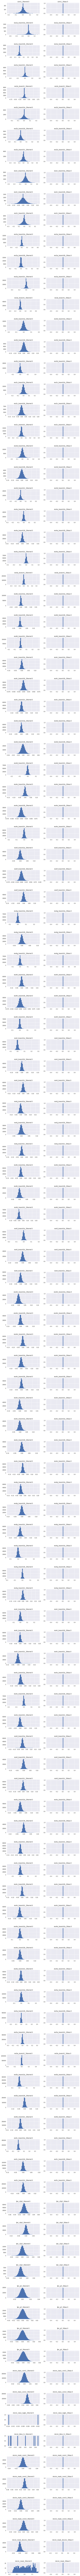

In [31]:
# Pick layer types to display
LAYER_TYPES = ['Conv2D', 'Dense', 'Conv2DTranspose']
# Get layers
layers = model.get_trainable_layers()
layers = list(filter(lambda l: l.__class__.__name__ in LAYER_TYPES, 
                layers))
# Display Histograms
fig, ax = plt.subplots(len(layers), 2, figsize=(10, 3*len(layers)),
                       gridspec_kw={"hspace":1})
for l, layer in enumerate(layers):
    weights = layer.get_weights()
    for w, weight in enumerate(weights):
        tensor = layer.weights[w]
        ax[l, w].set_title(tensor.name)
        _ = ax[l, w].hist(weight[w].flatten(), 50)
